In [2]:
import requests
import json
from tqdm.auto import tqdm

In [3]:
token = '1dd3d0375cb03132a38976d01e6a2e48c00f57aa614c4778711038f2e1254927e229d358c4ac6bd54163c'
version = '5.92'

#### Задание 1

+ Можно ли узнать, сколько лайков у комментария?
+ Подсказка: изучите документацию метода ```wall.getComments```, обратите внимание на параметр ```need_likes``` (https://vk.com/dev/wall.getComments)

#### Задание 2

+ Скачайте список пользователей, состоящих в группе https://vk.com/dormitory8hse. 
+ Постройте столбчатую диаграмму, показывающую, сколько человек из каких городов состоит в группе.

In [5]:
group = 'chepatsanyfgn'
offsets = [0, 1000, 2000]
users = set()

for off in offsets:
    data = requests.get(
        'https://api.vk.com/method/groups.getMembers',
        params={
            'group_id': group,
            'access_token': token,
            'v': version,
            'offset': off
        }
    ).json()
    print(data)
    users = users | set(data['response']['items'])
len(users)

{'response': {'count': 2282, 'items': [7586, 13606, 130314, 536684, 640287, 693390, 792255, 1102577, 1165528, 1728493, 1948638, 2630396, 3124701, 3460527, 3484858, 3893123, 4400585, 4431052, 4487875, 4520142, 4740203, 4798747, 4873323, 5579776, 5902502, 6220648, 6345189, 6402036, 6746113, 7559396, 7862914, 7916000, 8004707, 8017978, 8031651, 8091161, 8258925, 8301905, 8471820, 8479124, 8491479, 8929968, 9110772, 9282528, 9428857, 9595363, 9736421, 9769484, 10475985, 10510619, 10755507, 10804284, 11032809, 11437854, 11713362, 11758244, 12102224, 12136438, 12254323, 12545133, 12600247, 12680102, 12958678, 13152528, 13583514, 13678754, 13714048, 14163058, 14260938, 14312886, 14659482, 14709108, 14820953, 15125906, 15433629, 15604345, 15625070, 15918520, 15951120, 16409709, 16595501, 16701735, 16753400, 16910268, 17574517, 17695649, 17915213, 18027005, 18060069, 18081006, 18126415, 18173860, 18756199, 18772600, 18850478, 19383246, 19420666, 19479357, 19509452, 20006836, 20379826, 20401172,

2282

In [5]:
list(users)[:10]

[6746113,
 47407105,
 215212033,
 218619907,
 191881224,
 82567185,
 418721811,
 251633684,
 105496599,
 71856159]

In [8]:
import pandas as pd

In [25]:
data = requests.get(
        'https://api.vk.com/method/users.get',
        params={
            'user_ids': 82567185,
            'fields': 'sex, bdate, city, country, home_town',
            'access_token': token,
            'v': version
        }
    ).json()

In [26]:
u = data.get('response')[0]

In [27]:
for field in first_level:
    print(u.get(field))
for field in geo:
    print(u.get(field).get('title'))

82567185
Ksenia
Fonaryova
1
19.11.1998
Троицк
Moscow
Russia


In [36]:
','.join([str(u_id) for u_id in user_list[i*1000:(i+1)*1000]])

'6746113,47407105,215212033,218619907,191881224,82567185,418721811,251633684,105496599,71856159,176095264,32256033,71946273,174616610,272162852,435146784,205221926,558624803,251326504,290607145,139509802,355074093,58142768,469221424,583598131,29474868,184008757,43835448,100646971,139538492,311812157,72302654,152465471,208146499,249225285,295030854,137379911,91136074,82182222,289378389,434061402,445165658,124506206,146452577,313512033,321093730,176570471,514469991,31375465,244043882,536684,53870701,144261230,55292015,369086572,150507632,185843825,124473459,212725873,346402932,558616694,500408439,23191672,59691129,95875194,147738745,514617466,115937405,32800894,53309568,95101057,58896514,160198784,360751233,571973762,32559243,64536715,24457357,51359885,115290254,335577227,269340812,320037011,324939927,188731547,273490078,496214175,107712672,565878943,106307746,201838755,5902502,145121447,173912231,190525613,58904750,34926768,81809586,90779828,147992756,133673142,118808759,26345656,240316

In [38]:
data = requests.get(
        'https://api.vk.com/method/users.get',
        params={
            'user_ids': ','.join([str(u_id) for u_id in user_list[i*1000:(i+1)*1000]]),
            'fields': 'sex, bdate, city, country, home_town',
            'access_token': token,
            'v': version
        }
    )

In [40]:
data.

False

In [42]:
user_data

[]

In [55]:
from tqdm.auto import tqdm

In [56]:
user_data = []
first_level = ['id', 'first_name', 'last_name', 'sex', 'bdate', 'home_town']
geo = ['city', 'country']
user_list = list(users)
for i in tqdm(range(230)):
    data = requests.get(
        'https://api.vk.com/method/users.get',
        params={
            'user_ids': ','.join([str(u_id) for u_id in user_list[i*100:(i+1)*100]]),
            'fields': 'sex,bdate,city,country,home_town',
            'access_token': token,
            'v': version
        }
    ).json().get('response')
#     print(i)
    for u in data:
        res = []
        for field in first_level:
            res.append(u.get(field))
        for field in geo:
            res.append(u.get(field, {}).get('title'))
        user_data.append(res)
#     print('ok')

In [57]:
df = pd.DataFrame(user_data, columns=first_level+geo)

In [58]:
df

,id,first_name,last_name,sex,bdate,home_town,city,country
0,6746113,Ira,Panteleeva,1,9.2,None,Vologda,Russia
1,47407105,Dasha,Digor,1,10.12.1997,None,Moscow,Russia
2,215212033,Darya,Markina,1,4.10,None,Moscow,Russia
3,218619907,Sekemto,Dzhayve,1,None,None,None,Russia
4,191881224,Valeria,Burguchyova,1,22.8.1998,,Moscow,Russia
...,...,...,...,...,...,...,...,...
2276,99184628,Darya,Bukanova,1,15.11.1915,Москва,Moscow,Russia
2277,12136438,Ulyana,Sorokina,1,31.10.1997,Москва,Moscow,Russia
2278,362500087,Anya,Romanycheva,1,14.1,None,Moscow,Russia
2279,135827453,Anya,Zhitnyuk,1,19.1.2001,None,Moscow,Russia


In [59]:
df.head()

,id,first_name,last_name,sex,bdate,home_town,city,country
0,6746113,Ira,Panteleeva,1,9.2,None,Vologda,Russia
1,47407105,Dasha,Digor,1,10.12.1997,None,Moscow,Russia
2,215212033,Darya,Markina,1,4.10,None,Moscow,Russia
3,218619907,Sekemto,Dzhayve,1,None,None,None,Russia
4,191881224,Valeria,Burguchyova,1,22.8.1998,,Moscow,Russia


In [74]:
df.city.value_counts()[:10]

Moscow              1249
Saint Petersburg      37
Nizhny Novgorod       13
Krasnodar              9
Perm                   8
Krasnoyarsk            7
Saratov                6
Kazan                  6
Zelenograd             6
Yekaterinburg          6
Name: city, dtype: int64

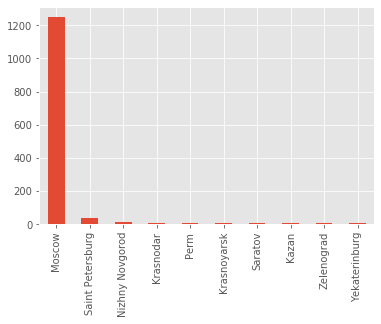

In [73]:
df.city.value_counts()[:10].plot(kind='bar');

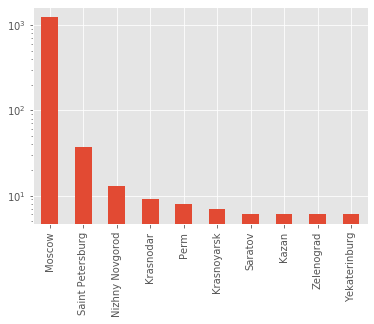

In [72]:
df.city.value_counts()[:10].plot(kind='bar', logy=True);

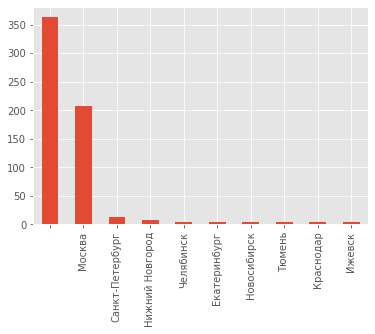

In [70]:
df.home_town.value_counts()[:10].plot(kind='bar');

In [71]:
from datetime import datetime

In [82]:
datetime.now() - datetime.strptime('22.8.1998', '%d.%m.%Y')

datetime.timedelta(7905, 40372, 694829)

In [85]:
def bdate(bdate):
    if bdate is None:
        return None
    elif len(bdate) < 8:
        return None
    else:
        return datetime.strptime(bdate, '%d.%m.%Y').year

In [86]:
df['year'] = df['bdate'].apply(bdate)

In [93]:
df.sort_values(by='year').head(10)

,id,first_name,last_name,sex,bdate,home_town,city,country,year
851,540997101,Clair,Wieck,1,2.1.1902,None,None,None,1902.0
789,154318196,Sonya,Markina,1,7.6.1902,None,Severodvinsk,Russia,1902.0
1731,387771474,Olya,Neolya,1,12.11.1905,,Moscow,Russia,1905.0
1028,417048396,Masha,Rybka,1,29.7.1905,,Kladbische,Russia,1905.0
917,208049773,Sasha,Smetankina,1,16.11.1906,Λέσβος,Moscow,Russia,1906.0
1707,368245806,Radost,Moya,2,7.2.1907,,None,None,1907.0
2276,99184628,Darya,Bukanova,1,15.11.1915,Москва,Moscow,Russia,1915.0
1604,359402361,Zheka,Bulgakova,1,3.6.1917,Штутгарт,Ussuriysk,Russia,1917.0
216,186438004,Nikol,Grossman,1,9.4.1917,None,New York City,USA,1917.0
718,434439412,Dmitry,Lastovetsky,2,7.11.1917,,Moscow,Russia,1917.0


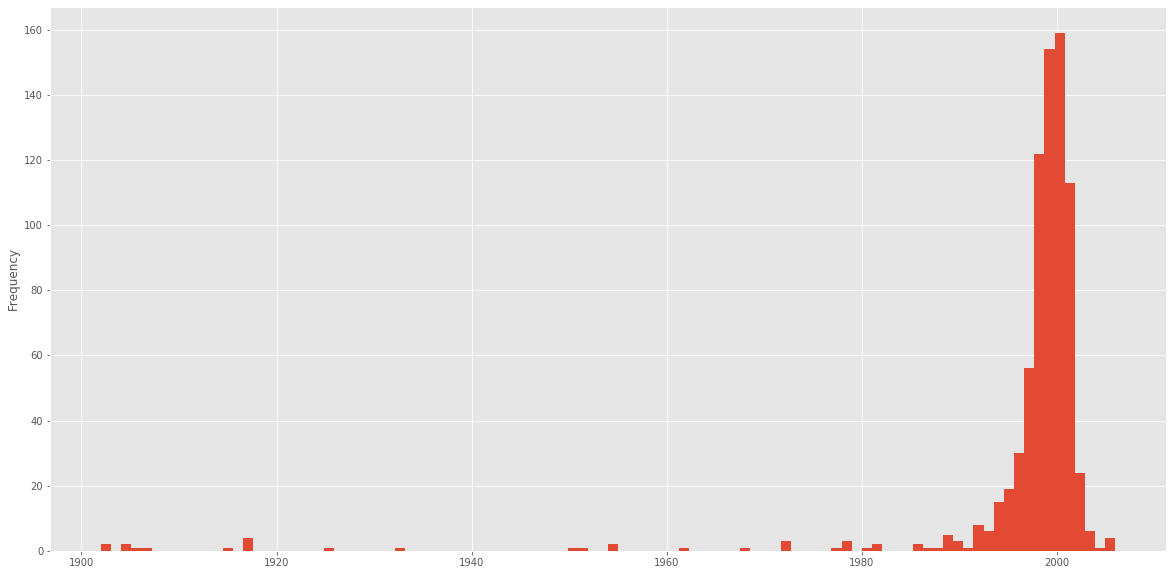

In [91]:
df['year'].plot(kind='hist', bins=100, figsize=(20, 10))

In [7]:
cities = []
i = 0
for user in tqdm(users):
    if i > 1000:
        break

    data = requests.get(
        'https://api.vk.com/method/users.get',
        params={
            'user_ids': user,
            'fields': 'home_town',
            'access_token': token,
            'v': version
        }
    ).json()
    
    if 'home_town' not in (data['response'][0]):
        continue
    
    cities.append(data['response'][0]['home_town'])
    i += 1

print(len(cities))


833


In [12]:
cities = [city for city in cities if city != '']
from collections import Counter
cities = Counter(cities)

In [13]:
cities = dict(cities)
cities = {c : cities[c] for c in cities if cities[c] > 2 and len(c) > 2}
sorted(cities.items(), key=lambda x: x[1], reverse=True)
# lambda signifies an anonymous function. In this case, this function takes the single argument x and returns x[1] (i.e. the item at index 1 in x). 

[('Москва', 208),
 ('Санкт-Петербург', 13),
 ('Нижний Новгород', 8),
 ('Екатеринбург', 5),
 ('Новосибирск', 5),
 ('Челябинск', 5),
 ('Ижевск', 4),
 ('Тула', 4),
 ('Краснодар', 4),
 ('Тюмень', 4),
 ('Пенза', 3),
 ('Омск', 3),
 ('Казань', 3),
 ('Самара', 3),
 ('Чита', 3),
 ('Архангельск', 3),
 ('Иваново', 3),
 ('Тольятти', 3),
 ('Воронеж', 3),
 ('москва', 3),
 ('Магнитогорск', 3)]

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from matplotlib import style
style.use('ggplot')

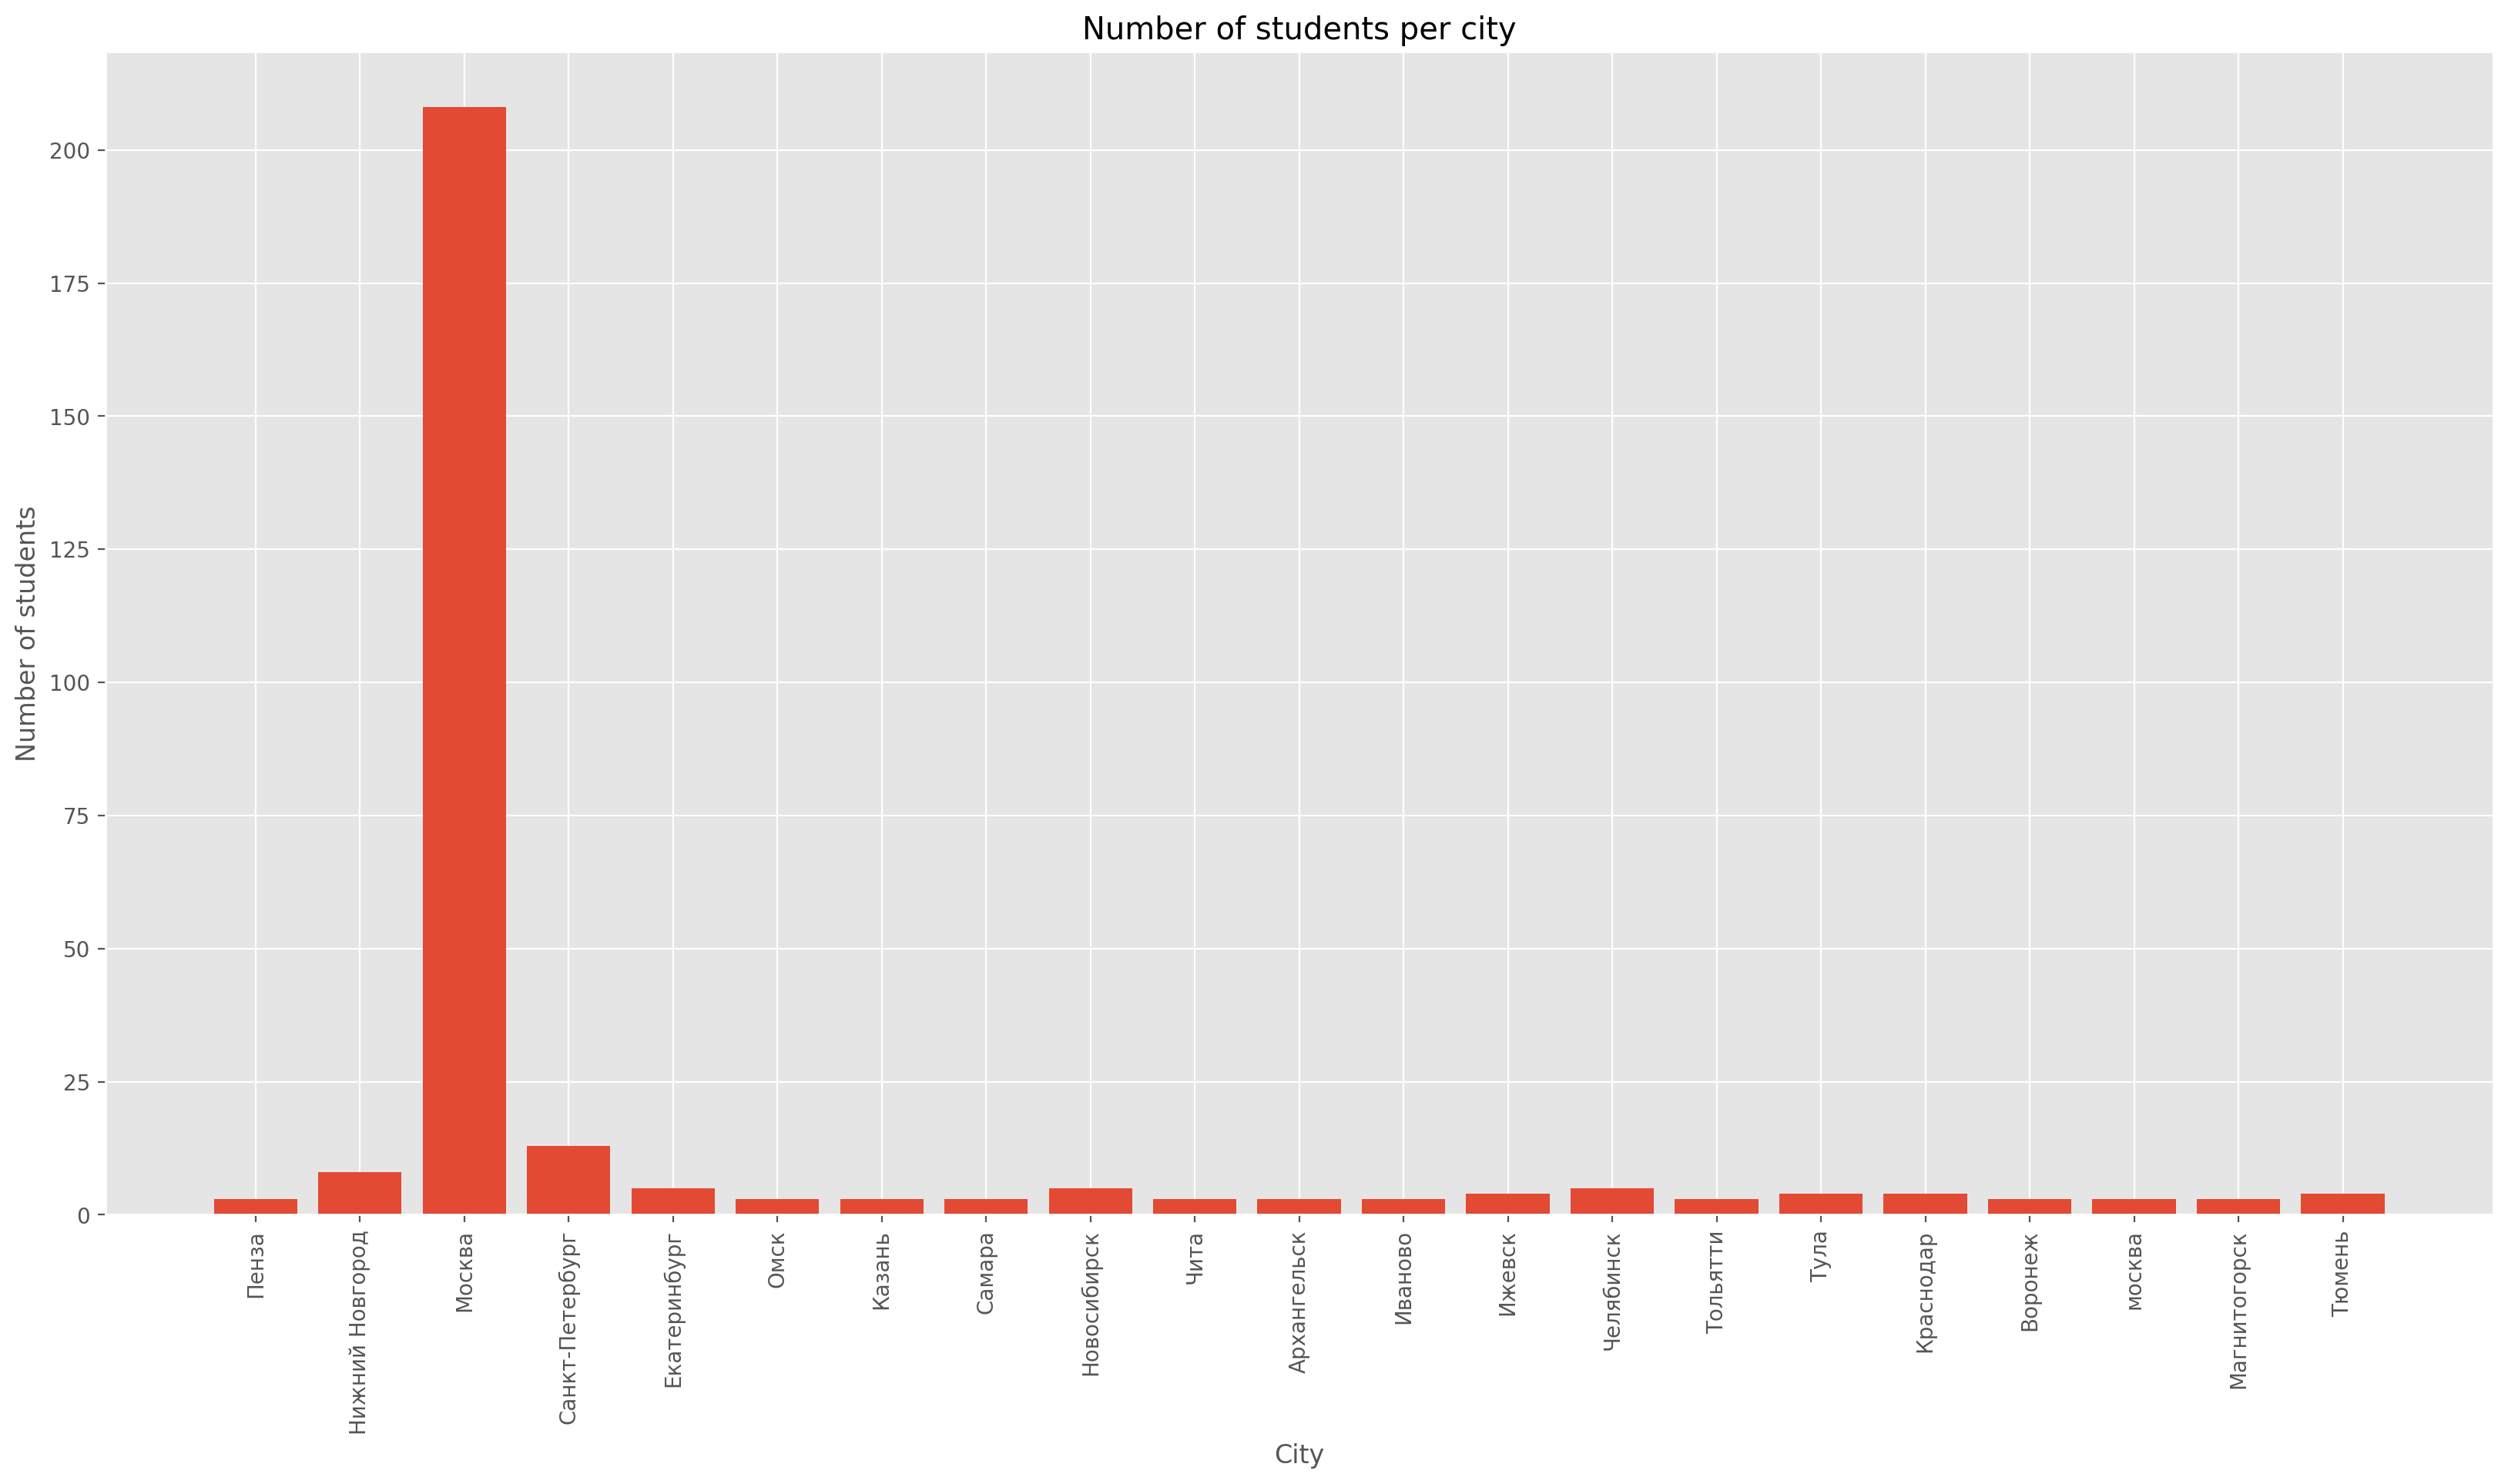

In [15]:
city_nums = [cities[city] for city in cities]
city_labs = [city for city in cities]
plt.figure(figsize=(20, 10), dpi=200)
plt.bar(range(len(city_labs)), city_nums)

plt.title('Number of students per city')
plt.ylabel('Number of students')
plt.xlabel('City')
plt.xticks(range(len(city_labs)), city_labs, rotation=90)
#plt.legend()
plt.show()

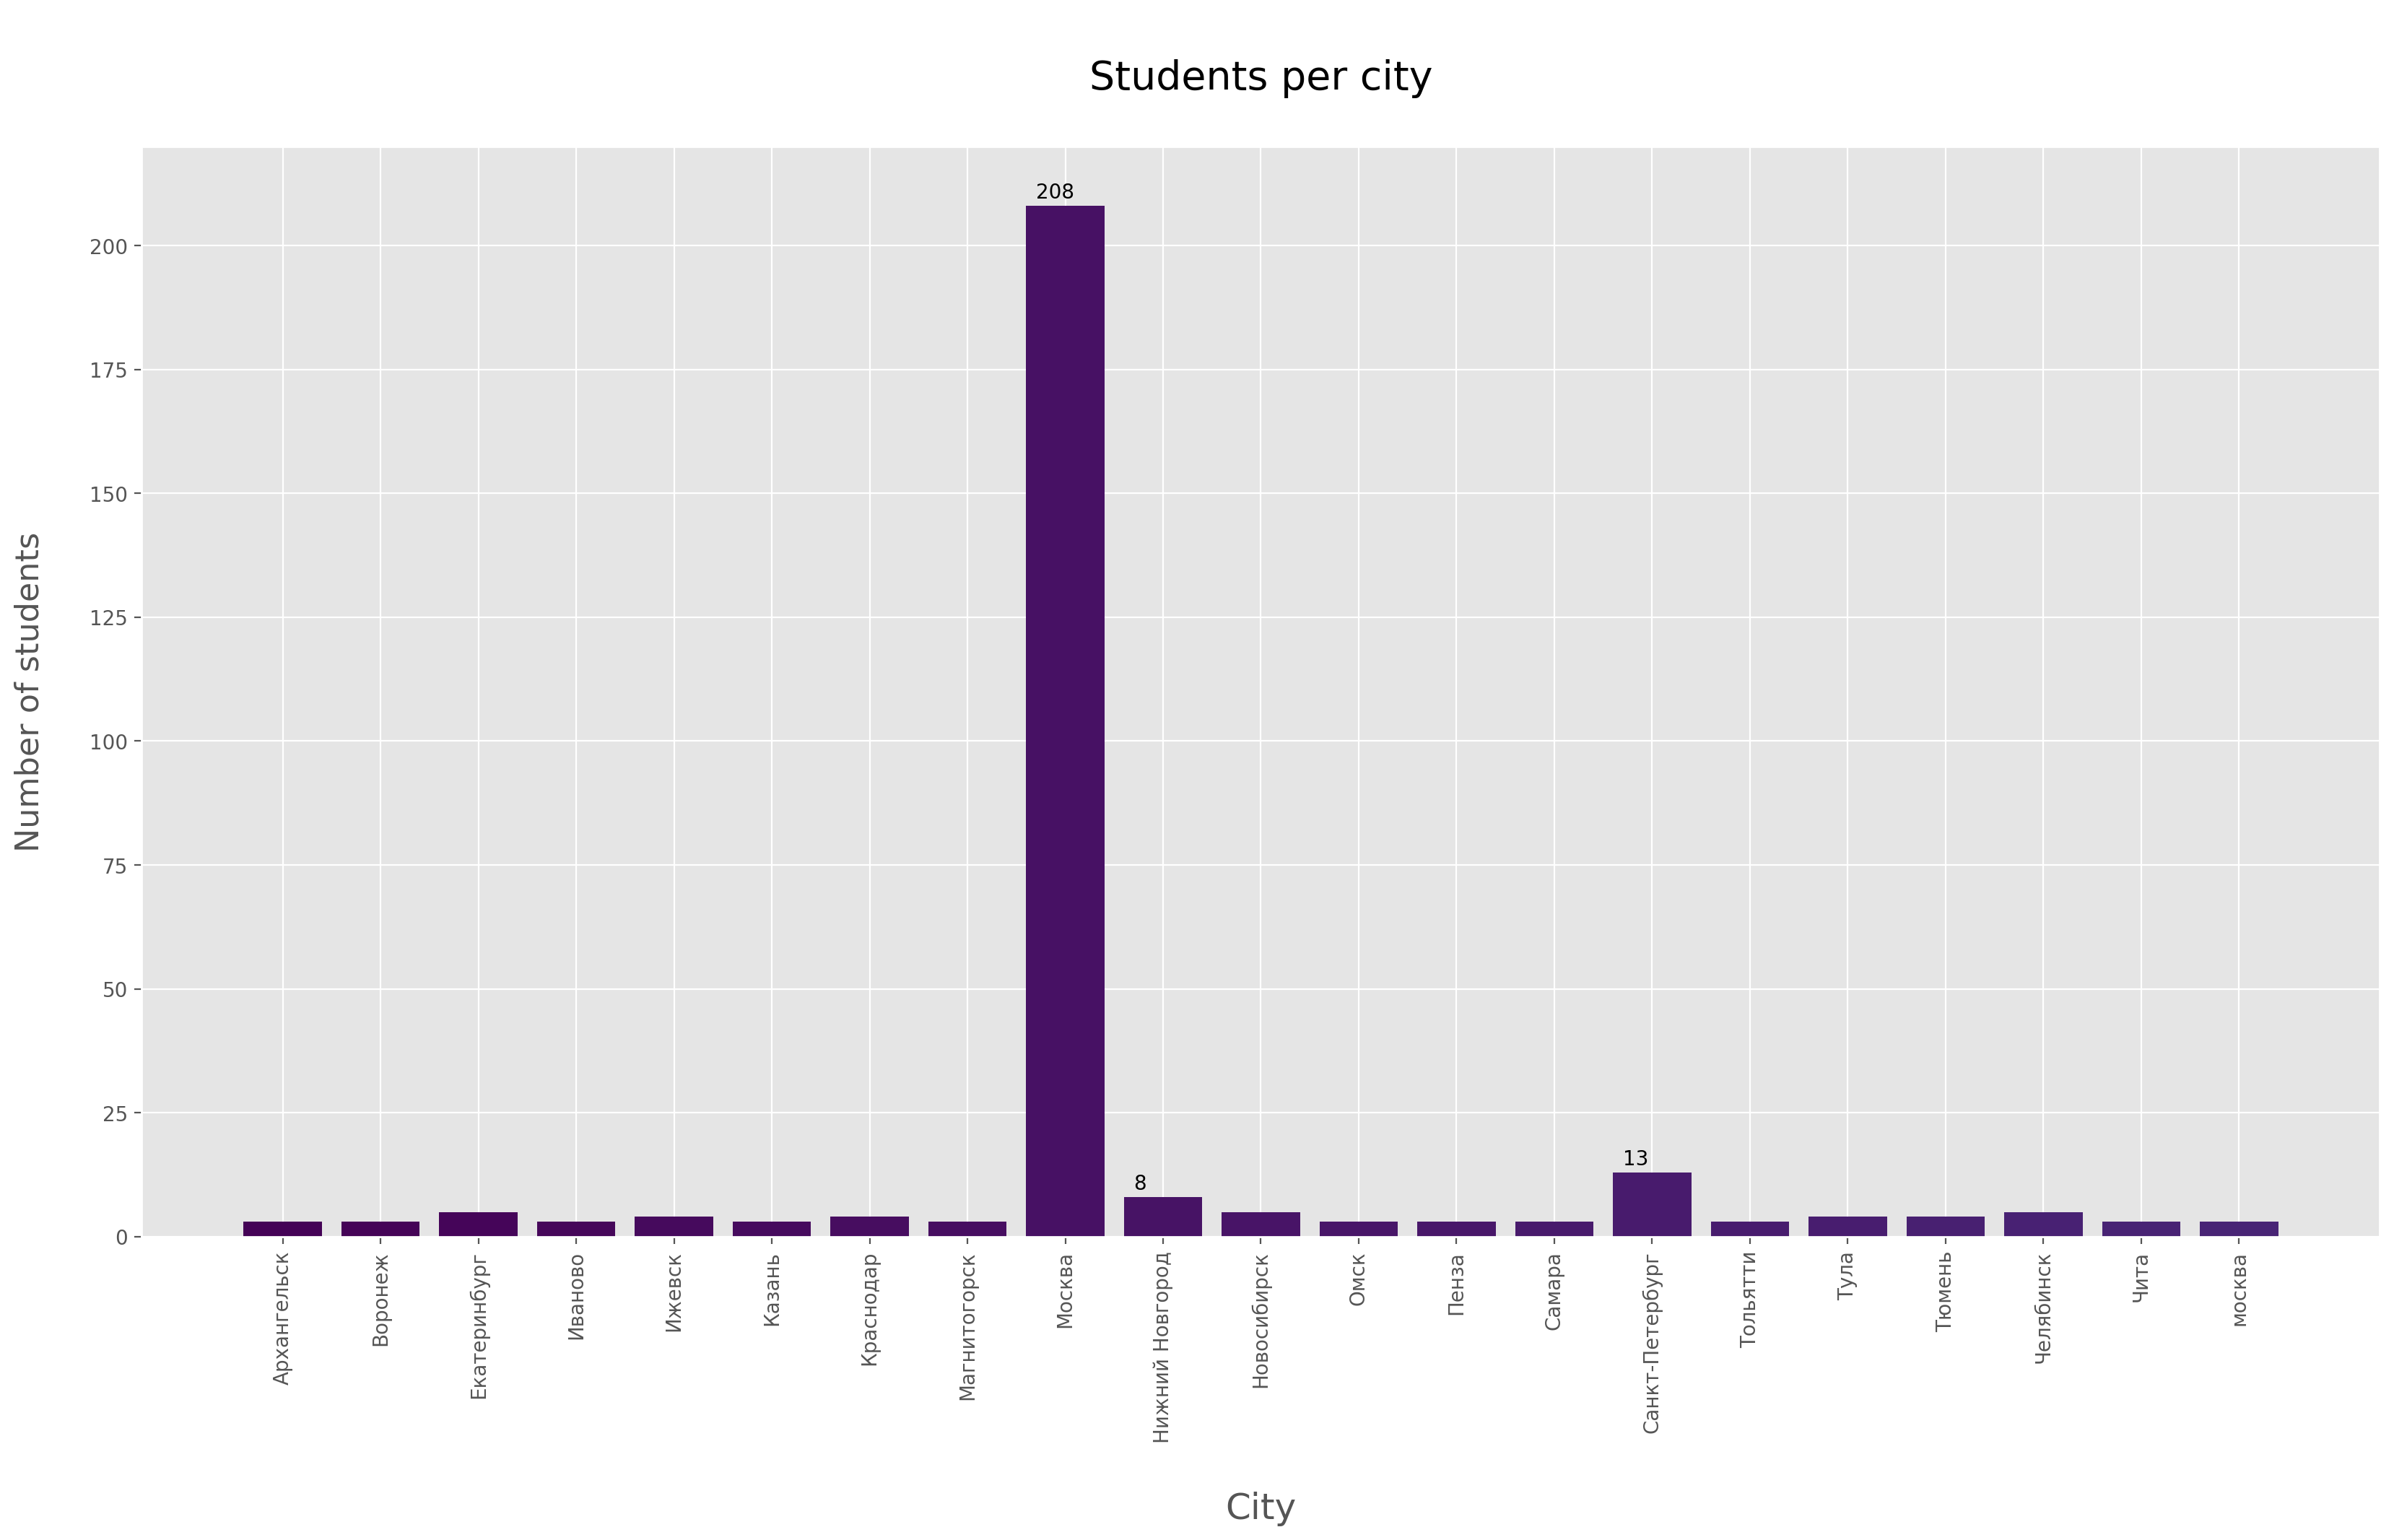

In [16]:
city_nums = [c[1] for c in sorted(cities.items(), key=lambda x: x[0], reverse=False)] # the data on the Y-axis
city_labs = sorted([city for city in cities]) # the X-axis labels # sorting the names of the cities alphabetically
x = range(len(city_labs)) # the data on the X-axis

# setting the palette
colors = sns.color_palette('viridis', max(city_nums)) 

plt.figure(figsize=(20, 10), dpi=200)
plt.bar(x, city_nums, color=colors)

# drawing the number of students
for a, b in zip(x, city_nums):
    if b > 5:
        plt.scatter(a, b+1.5, s=0)
        plt.text(a-0.3, b+1.5, str(b))


plt.title('\nStudents per city\n',  fontsize=20)
plt.ylabel('Number of students\n',  fontsize=16)
plt.xlabel('\nCity',  fontsize=18)
plt.xticks(x, city_labs, rotation=90)
plt.show()

#### Задание 3

+ Скачайте примерно сто постов примерно ста пользователей из Москвы и Петербурга и посторойте диаграмму распределения у них слов Питерского сленга (например, 'поребрик', 'кура', 'бадлон')
+ Можно написать полностью свой код, можно отредактировать код, который лежит [тут](https://github.com/hse-python-2nd-2019/seminars/blob/master/different_api/VK_API_Examples_Task3.ipynb) (соответствующий файл с данными [тут](https://github.com/hse-python-2nd-2019/seminars/blob/master/different_api/data.csv))
+ Если появляется ошибка 6 (https://vk.com/dev/errors), слишком много запросов в секунду, не забывайте про опцию ```time.sleep ()``` модуля ```time```

#### Задание 4

+ Скачайте список пользователей, состоящих в группе https://vk.com/hse_university. Постройте столбчатую диаграмму, показывающую распределение пользователей по их году рождения.
+ Найдите, сколько в этой группе состоит пользователей, чьим университетом является не Вышка. Постройте диаграмму, показывающую распределение этих пользователей по университетам (если все не влезут, то 10 самых частотных университетов).
+ Соберите корпус записей в группе Вышки и комментариев к ним (можно взять первые 10000 записей). Найдите самые частотные биграммы в этом корпусе.